### Naïve Bayes

In [6]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [2]:
# Conexión con la BD

# Conexión con la base

# Parámetros de conexión
param_dic = {
    "host"      : "localhost",
    "database"  : "cancerdb",
    "user"      : "manu",
    "password"  : "foo"
}

# Conexión e importanción de datos desde la base.
conn = psycopg2.connect(**param_dic)
df = pd.read_sql_query('SELECT * FROM esophageal_clean',con=conn)

In [3]:
df

,id_esophageal,region,age,sex,alcohol,tobacco,family_history,diff_swallowing,pain_swallowing,weight_loss,...,adj_organ,tnm_stage,surgery,t_hital_eso,t_thoracic_eso,chemotherapy,radiotherapy,hospital_stay,status_patient,khat
0,1,OROMIA,66,0,1,1,1,0,0,1,...,7,2,0,1,1,0,0,1,1,1
1,2,ADDIS ABABA,66,1,1,1,1,0,1,0,...,7,0,1,0,1,0,0,1,1,0
2,3,ADDIS ABABA,62,1,0,0,1,0,1,1,...,2,3,0,1,1,1,0,1,1,0
3,4,OROMIA,62,1,0,1,1,0,1,0,...,3,3,1,0,1,1,0,16,1,1
4,5,OROMIA,45,0,1,1,1,0,1,1,...,7,4,0,1,1,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,345,OROMIA,55,1,1,1,1,0,1,1,...,7,4,1,0,1,0,0,1,1,0
345,346,SNNPR,45,0,1,1,1,0,1,1,...,7,2,1,0,1,0,0,2,0,1
346,347,ADDIS ABABA,67,1,1,1,1,0,1,1,...,7,3,1,1,1,0,0,1,0,0
347,348,OROMIA,32,0,1,1,1,0,1,1,...,7,4,1,1,1,0,0,2,1,1


In [4]:
X = df.drop(columns=['status_patient','id_esophageal','region'])
y = df['status_patient']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = NaiveBayes.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
y_test - y_pred

229    0
130    1
244    0
89     1
331   -1
      ..
232    1
113    1
27     1
179    1
262    1
Name: status_patient, Length: 105, dtype: int64

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

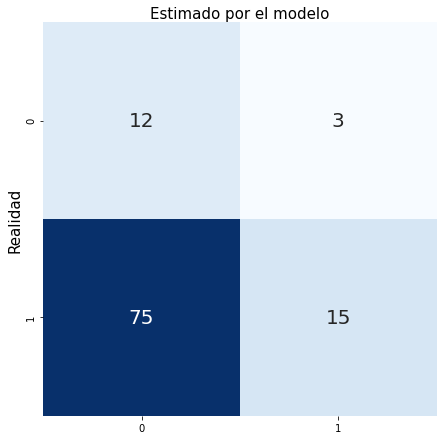

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [12]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.8333333333333334
Exactitud: 0.2571428571428571
Sensibilidad: 0.16666666666666666
Especificidad: 0.8
